<a href="https://colab.research.google.com/github/chpham92/chpham92/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow


In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building block for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

## 1. Data (preparing and loading)

Data can almost be anything.. in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [ ]:
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training tests (one of the msot important concepts in machine learning in general)

Let's create a training and test set with our data

In [ ]:
# Create a train/test split
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!'

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


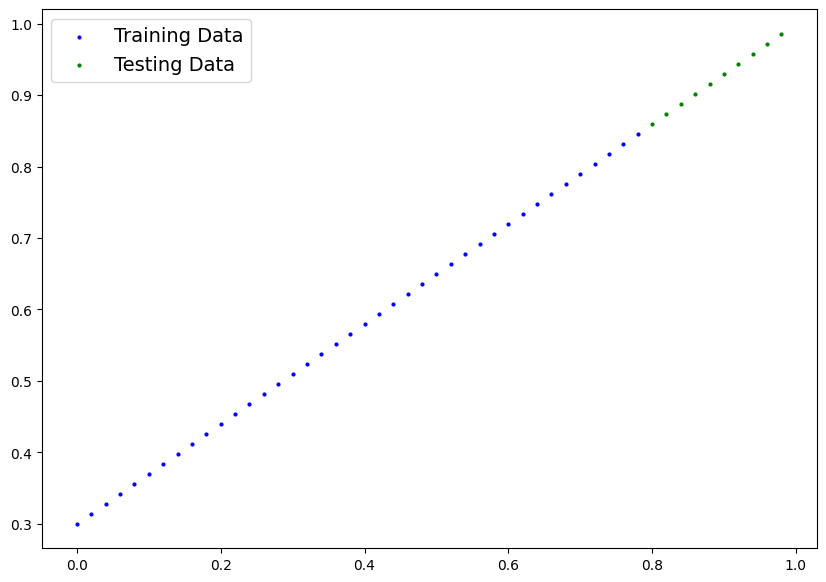

In [ ]:
plot_predictions();

from inspect import modulesbyfile
## 2. Build model

Our frist PyTorch model

This is very exciting... let's do it

Because we're going to be building classes throughout the cours, I'd recommend getting familiar with OOP in Python, to do so you can use the following resource from Real PyThon: https://realpython.com/puthon3-object-oriented-programming/


What our model does:
* start with random values, (weight, and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Graident descent
2. Backpropagation

In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorch inherits from nn.module
  """
  A PyTorch model to perform linear regression
  """
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #<- start with random weights and try to adjust it to the ideal weight
                                             requires_grad=True, #<- can this parameter be updated via gradient descent?
                                             dtype=torch.float))# <- PyTorch loves the datatype torch.float
    self.bias = nn.Parameter(torch.randn(1, #<- start with random bias and try to adjust it to the ideal biad
                                         requires_grad=True, #<- can this parameter be updated via gradient descent?
                                         dtype=torch.float)) # <- PyTorch loves the datatype torch.float

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- 'x' is the input data
    return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all the building blocks for computational graphs (a neural netowrk can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for use
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch are, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model, let's see wha's inside..

So we can check our odel parameters or what's inside our model using .parameters()

In [ ]:
# create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Making predictions using 'torch.inference_model()'

To check our model's predictive power, let's see how well it preedicts y_test based on X_test
When we pass data through our odel, it's going to run it through the forward() method

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
# You can also do somethign similar with torch.no_grad(), however torch.inference_model() is preferred
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

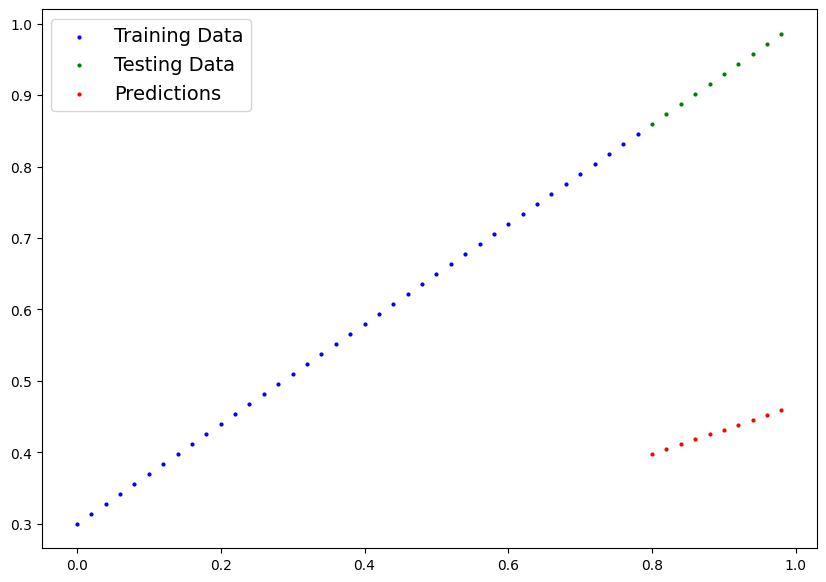

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some 'unknown' parameter (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model's predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs. Lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters  (e.g weight and bias) to improve the loss function. -https://pytorch.org/docs/stable/optim.html#module-torch.optim
  * Inside the optimizer you'll often have to set two parameters:
    * params - the model parameters you'd like to optimize, for example params=model_0.parameters()
    * lr (learning rate) the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large results in large)

And specifically for Pytorch, we need:
  * A training loop
  * A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate

### Building a training loop and a testing loop in PyTorch

A couple of thigns we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our model's forward() function) - also called forward propagation
2. Calculate the loss (comapre forward pas spredictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backward through he network to calculate the graident of each of the parameters of our with respect to the loss
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data
epochs = 1000
epoch_count = []
loss_values = []
test_loss_values = []


### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Optimizer step (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so.. we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things
  # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

# Print out model state_dict
print(model_0.state_dict())


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test Loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test Loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test Loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test Loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test Loss: 0.03233227878808975
Ep

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values


(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00893248, 0.00893248,
        0.00893248, 0.00893248, 0.00893248, 0.00

In [ ]:
torch.tensor(epoch_count)

tensor([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
        280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410,
        420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550,
        560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690,
        700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830,
        840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970,
        980, 990])

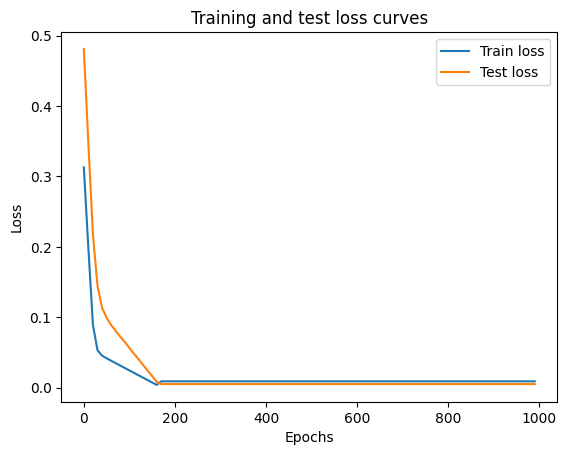

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, np.array(test_loss_values), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();


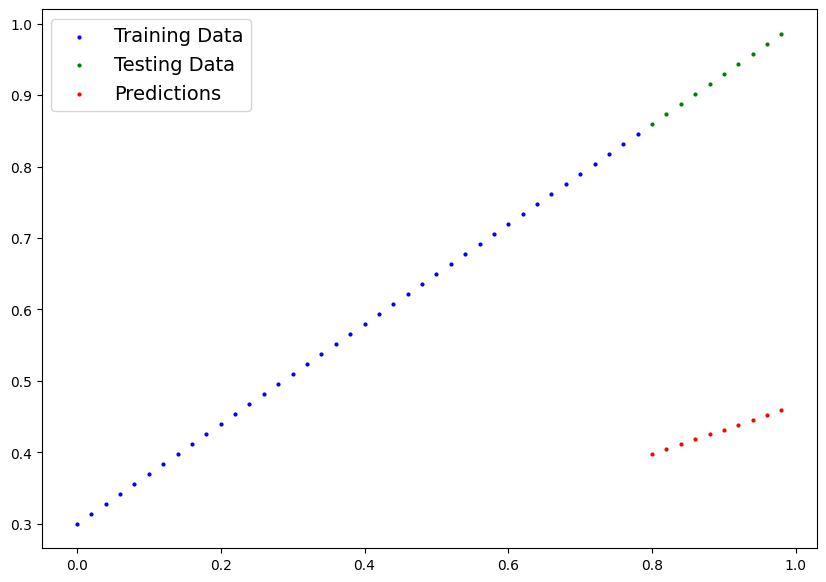

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds);

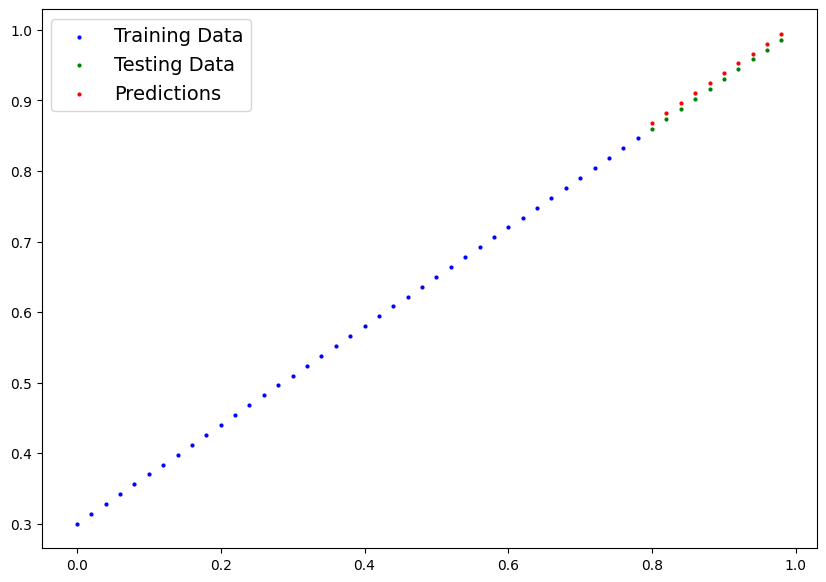

In [ ]:
plot_predictions(predictions=y_preds_new);

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch

1. 'torch.save()' - This allows you to save a PyTorch object in Python's pickle format
2. 'torch.load() - allows you to load a saved PyTorch object
3. 'torch.nn.Module.load_state_dict()' - this allows you to laod a mode's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


## Loading a PyTorch model

Since we asvaed our model's 'state_dict()' rather the entire model, we'll create a new instance of our model class and load the saved 'state_dict' into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.state_dict(torch.load(f=MODEL_SAVE_PATH))

/tmp/ipython-input-3599568183.py:5: FutureWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/main/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  loaded_model_0.state_dict(torch.load(f=MODEL_SAVE_PATH))


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Comapre laoded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

## 6. Putting it all together

Let's go back throught the steps above and see it all in one place.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is availble, the code will default to using CPU


In [ ]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


## 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X & y (feature and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

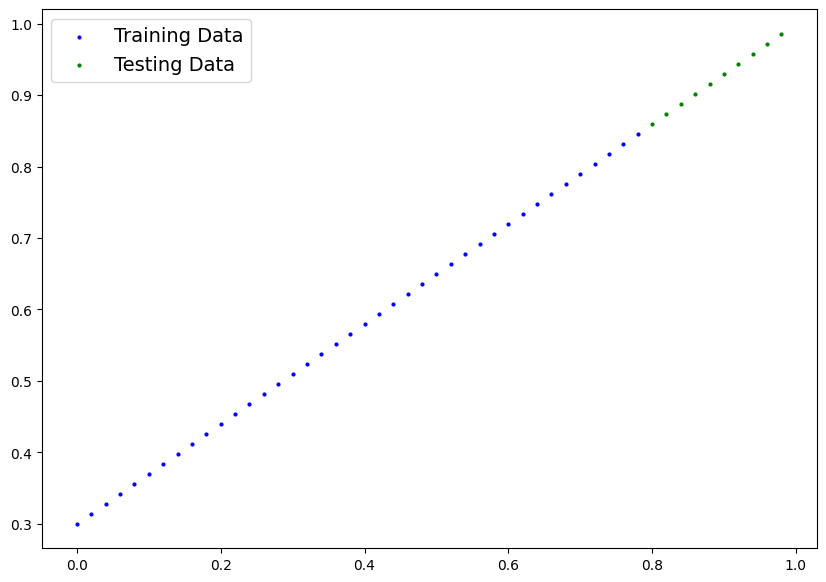

In [ ]:
# Plot the data
# Note: if you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch linear model

In [ ]:
# Create a linea rmodel by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup for optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)
# Let's write a training loop
torch.manual_seed(42)

epochs =200

# Put data to the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  # Print out what's happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.01380180753767

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on hte test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

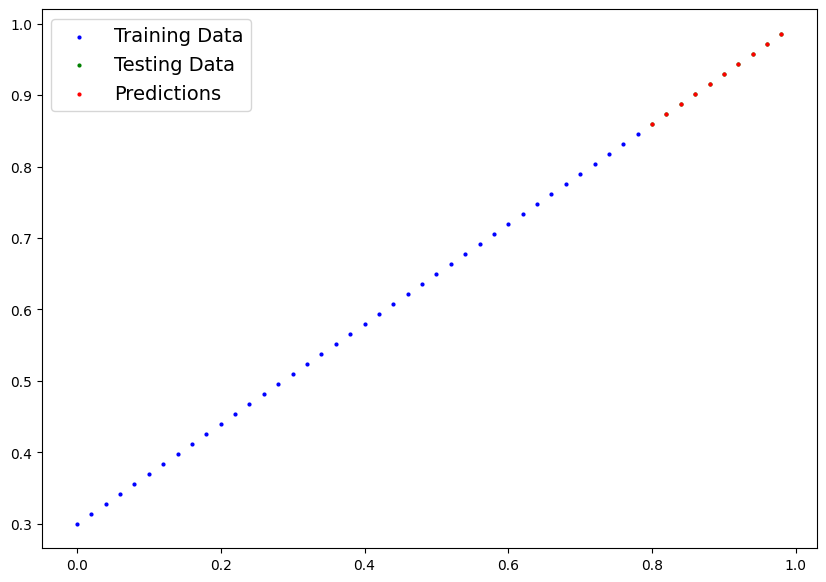

In [ ]:
# Check out the model predictions visually
plot_predictions(predictions=y_preds)

### 6.5 Saving and loading a trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "09_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/09_pytorch_workflow_model_1.pth


In [ ]:
# Load a PyTorch model

# Create a new instance of linear regression model
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)


LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])